# LightGBM
- Light Weight Gradient Boosting Machines.
- Gradient boosting framework by Microsoft.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('golf.txt')

In [3]:
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,85,85,Weak,No
1,Sunny,80,90,Strong,No
2,Overcast,83,78,Weak,Yes
3,Rain,70,96,Weak,Yes
4,Rain,68,80,Weak,Yes


Convert nominal features to numeric

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp.     14 non-null     int64 
 2   Humidity  14 non-null     int64 
 3   Wind      14 non-null     object
 4   Decision  14 non-null     object
dtypes: int64(2), object(3)
memory usage: 688.0+ bytes


In [5]:
le = LabelEncoder()

In [6]:
# transform nominal to numeric
for col in df.columns:
    if df[col].dtypes == 'object': 
        df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,2,85,85,1,0
1,2,80,90,0,0
2,0,83,78,1,1
3,1,70,96,1,1
4,1,68,80,1,1


In [8]:
X = df.drop(axis=1,columns=['Decision']).values # for numpy array
y = df['Decision']

### Modelling

In [9]:
# pip install lightgbm
import lightgbm as lgb  # LightGBM package

In [10]:
# tranforms our variables to appropriate for LightGBM
# pass categorical_features except output variable
# feature_name - areference of all columns except output
lgb_train = lgb.Dataset(X,y,
                        feature_name=['Outlook', 'Temp', 'Humidity', 'Wind'],
                       categorical_feature=['Outlook','Wind'])

In [11]:
# configuration parameters
params ={
    'boosting_type': 'gbdt', # gradient boosting decision trees
    'objective': 'multiclass', # classification
#     'objective': 'regression'
    'metric': 'multi_logloss', # log loss function
#     'metric': 'rmsle' for regression root mean square log error
    'num_class': len(df['Decision'].unique()), # number of target classes
    'min_data' :1 # only in case of small data sets
}

In [12]:
# training the model
gbm_model = lgb.train(params,lgb_train,num_boost_round=50)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 4
[LightGBM] [Info] Start training from score -1.029619
[LightGBM] [Info] Start training from score -0.441833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

C:\Users\syeda\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


In [13]:
predictions = gbm_model.predict(X)

In [14]:
predictions

array([[0.99589453, 0.00410547],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.00235277, 0.99764723],
       [0.99589453, 0.00410547]])

In [15]:
# if pred[0]  > pred [1] -- target =0
# if pred[0]  < pred [1] -- target =1
index = 0 # to initialise index for actuals
for pred in predictions:
    if pred[0] > pred [1]:
        p = 'No'
    else:
        p = 'Yes'
        
    a = y[index]
    if a == 0:
        a = 'No'
    else:
        a = 'Yes'
    index +=1
    print(f'Prediction {p}, Actual {a}')

Prediction No, Actual No
Prediction No, Actual No
Prediction Yes, Actual Yes
Prediction Yes, Actual Yes
Prediction Yes, Actual Yes
Prediction No, Actual No
Prediction Yes, Actual Yes
Prediction No, Actual No
Prediction Yes, Actual Yes
Prediction Yes, Actual Yes
Prediction Yes, Actual Yes
Prediction Yes, Actual Yes
Prediction Yes, Actual Yes
Prediction No, Actual No


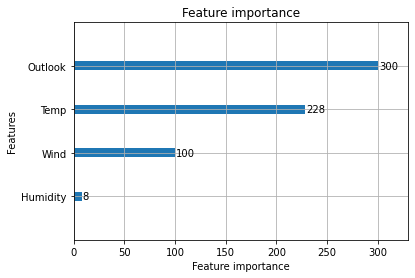

In [16]:
ax = lgb.plot_importance(gbm_model) # for plotting feature importance

In [17]:
# Plot the decision tree if graphviz installed
# lgb.plot_tree(gbm_model)